# Pandas groupby

Pandas groupby can make it easy to perform statistics on relevant groupings of data. 

The groupby feature combines filtering, looping, and running statistics into one line. Your main job is to make sure you are using it correctly and to test it is working as you would expect.

<a href=https://pandas.pydata.org/docs/user_guide/groupby.html>Pandas groupby examples</a>

## Demonstrating groupby on the SPC tornado dataset:

If we wanted to get statistics for each year, we might be tempted to use filtering:

In [1]:
import pandas as pd

tor = pd.read_csv("1950-2022_actual_tornadoes.csv")

# DO NOT DO THIS!
yr_1950 = tor[tor.yr==1950]
yr_1951 = tor[tor.yr==1951]

print("Count for 1950", len(yr_1950))
print("Count for 1951", len(yr_1951))

Count for 1950 201
Count for 1951 260


As you can imagine, if we try this on a dataset of 100s or 1000s of years, this will become overwhelmingly complicated.

Let's examine a better way with some example data:

In [2]:
test_data = {'month': [1, 1, 1, 4, 5, 8, 8, 10], 'data_value': [18.1, 9.1, 0.5, 1.0, 5.4, 9.0, 10.4, 9.5]}

df = pd.DataFrame.from_dict(test_data)

df

,month,data_value
0,1,18.1
1,1,9.1
2,1,0.5
3,4,1.0
4,5,5.4
5,8,9.0
6,8,10.4
7,10,9.5


If we wanted to find the mean ```data_value``` for each month, we could try and filter the data:

In [3]:
df[df.month==1]

,month,data_value
0,1,18.1
1,1,9.1
2,1,0.5


and then find the mean

In [4]:
df[df.month==1]['data_value'].mean()

9.233333333333334

and then repeat this for each month

In [5]:
print("Month 1 mean is", df[df.month==1]['data_value'].mean())
print("Month 4 mean is", df[df.month==4]['data_value'].mean())
print("Month 5 mean is", df[df.month==5]['data_value'].mean())
print("Month 8 mean is", df[df.month==8]['data_value'].mean())
print("Month 10 mean is", df[df.month==10]['data_value'].mean())

Month 1 mean is 9.233333333333334
Month 4 mean is 1.0
Month 5 mean is 5.4
Month 8 mean is 9.7
Month 10 mean is 9.5


we could even turn this into a loop

In [6]:
for month_int in df['month'].unique():

    condition = df.month==month_int

    df_filter = df[condition]

    mean_result = df_filter['data_value'].mean()

    print(f"The mean for month {month_int} is {mean_result:.2f}")

The mean for month 1 is 9.23
The mean for month 4 is 1.00
The mean for month 5 is 5.40
The mean for month 8 is 9.70
The mean for month 10 is 9.50


### However, this is way too complicated. Groupby can do this all for you!

In [7]:
group_means = df.groupby('month').mean()

group_means

,data_value
month,
1,9.233333
4,1.000000
5,5.400000
8,9.700000
10,9.500000


### Groupby 'yr' in the tornado dataset

We can easily get the count of tornadoes from each year using the groupby and ```count``` method:

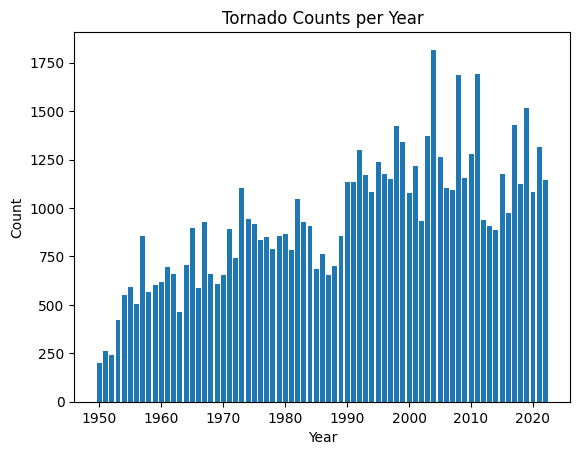

In [8]:
import matplotlib.pyplot as plt

yr_counts = tor.groupby('yr').count()

# for count you can pick any column, I picked 'om'.
# this will not work for sum, mean, median, etc.
plt.bar(yr_counts.index, yr_counts['om'])

plt.title("Tornado Counts per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

You can also loop through lists and run statistics.

Example 1: Number of fatalities per year

In [9]:
for group_id, group_data in tor.groupby('yr'):

    print("tornado fatalities in", group_id, "=", group_data['fat'].sum())

for group_id, group_data in tor.groupby('yr'):

    print("Average month in", group_id, group_data['mo'].mean())

tornado fatalities in 1950 = 70
tornado fatalities in 1951 = 34
tornado fatalities in 1952 = 230
tornado fatalities in 1953 = 523
tornado fatalities in 1954 = 36
tornado fatalities in 1955 = 129
tornado fatalities in 1956 = 81
tornado fatalities in 1957 = 192
tornado fatalities in 1958 = 67
tornado fatalities in 1959 = 58
tornado fatalities in 1960 = 46
tornado fatalities in 1961 = 52
tornado fatalities in 1962 = 30
tornado fatalities in 1963 = 31
tornado fatalities in 1964 = 73
tornado fatalities in 1965 = 301
tornado fatalities in 1966 = 98
tornado fatalities in 1967 = 114
tornado fatalities in 1968 = 131
tornado fatalities in 1969 = 66
tornado fatalities in 1970 = 73
tornado fatalities in 1971 = 159
tornado fatalities in 1972 = 27
tornado fatalities in 1973 = 89
tornado fatalities in 1974 = 366
tornado fatalities in 1975 = 60
tornado fatalities in 1976 = 44
tornado fatalities in 1977 = 43
tornado fatalities in 1978 = 53
tornado fatalities in 1979 = 84
tornado fatalities in 1980 = 28

But, it is usually easier to do it in one line:

Text(0.5, 0, 'Year')

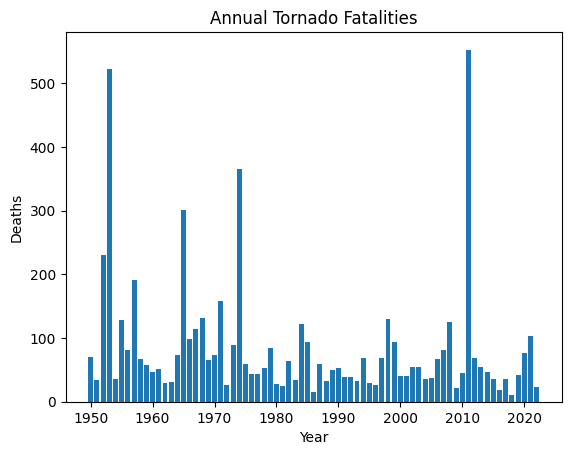

In [10]:
fatality_by_year = tor.groupby('yr').sum()

plt.bar(fatality_by_year.index, fatality_by_year['fat'])

plt.title("Annual Tornado Fatalities")
plt.ylabel("Deaths")
plt.xlabel("Year")

## Examining the hurricane dataset using pandas and groupby

We should always read in the dataset and examine some basic information about it:

In [11]:
## index_col sets that column name to the index
hur = pd.read_csv("ibtracs_2020_final.csv", index_col='SID')

hur.columns

Index(['SEASON', 'NUMBER', 'NAME', 'ISO_TIME', 'NATURE', 'LAT', 'LON',
       'WMO_WIND', 'WMO_PRES', 'WMO_AGENCY',
       ...
       'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER', 'USA_SEAHGT',
       'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW',
       'STORM_SPEED', 'STORM_DIR'],
      dtype='object', length=160)

There are several columns that we do not care about, so we can subset them by providing a list of the columns we do want:

In [12]:
cols_wanted = ['SEASON', 'NUMBER', 'NAME', 'ISO_TIME', 'NATURE', 'LAT', 'LON', 'USA_WIND', 'USA_PRES', 'USA_SSHS']

hur_sub = hur[cols_wanted]

hur_sub

,SEASON,NUMBER,NAME,ISO_TIME,NATURE,LAT,LON,USA_WIND,USA_PRES,USA_SSHS
SID,,,,,,,,,,
2020137N24278,2020,25,ARTHUR,5/15/2020 12:00,DS,23.5000,-81.6000,25,1011,-3
2020137N24278,2020,25,ARTHUR,5/15/2020 15:00,DS,23.8552,-81.1955,25,1011,-3
2020137N24278,2020,25,ARTHUR,5/15/2020 18:00,DS,24.2000,-80.8000,25,1011,-3
2020137N24278,2020,25,ARTHUR,5/15/2020 21:00,DS,24.5350,-80.4273,25,1010,-3
2020137N24278,2020,25,ARTHUR,5/16/2020 0:00,DS,24.9000,-80.1000,25,1010,-3
...,...,...,...,...,...,...,...,...,...,...
2020318N16289,2020,101,IOTA,11/18/2020 0:00,TS,13.7333,-86.7667,40,1000,0
2020318N16289,2020,101,IOTA,11/18/2020 3:00,TS,13.7690,-87.2733,35,1002,0
2020318N16289,2020,101,IOTA,11/18/2020 6:00,TS,13.8000,-87.8000,30,1005,-1


We can calculate per storm statistics by using a unique identifier.

Why will 'NAME' work for one season, but not for many seasons?

In [13]:
for sid, storm in hur_sub.groupby('SID'):

    print(sid)

2020137N24278
2020147N27281
2020150N09269
2020173N34287
2020185N32284
2020187N28270
2020203N09323
2020204N25274
2020206N11343
2020212N13343
2020223N10332
2020226N35282
2020227N10278
2020228N12322
2020230N11335
2020243N32274
2020244N12298
2020248N12341
2020250N15348
2020254N11343
2020254N25287
2020256N14342
2020259N09343
2020259N47337
2020260N21265
2020275N14286
2020277N13293
2020290N31305
2020294N12280
2020303N12301
2020313N28310
2020318N16289


Find the maximum wind speed for each storm name

In [14]:
max_values = hur_sub.groupby('NAME').max()

max_values['USA_WIND']

NAME
ALPHA                55
AMANDA:CRISTOBAL     50
ARTHUR               55
BERTHA               45
BETA                 50
DELTA               120
DOLLY                40
EDOUARD              40
EPSILON             100
ETA                 130
FAY                  50
GAMMA                60
GENEVIEVE            20
GONZALO              55
HANNA                75
IOTA                140
ISAIAS               75
JOSEPHINE            40
KYLE                 45
LAURA               130
MARCO                65
NANA                 65
NOT_NAMED            30
OMAR                 35
PAULETTE             90
RENE                 45
SALLY                90
TEDDY               120
THETA                60
VICKY                45
WILFRED              35
ZETA                 90
Name: USA_WIND, dtype: int64

# Try it yourself

Group the hurricane data by "NAME" and print the name of each group

Group the hurricane data by "USA_SSHS" (Saffir-Simpson scale), and print out the unique NAMEs in each group.

Group the hurricane data by month (df.ISO_TIME.dt.month) and count the number of unique storms.

Plot the "tracks" of storms that reached at least CAT 1. Hint, look at the metadata in slides 16, 17, and 18.

In [15]:
import matplotlib.pyplot as plt

# your code here

plt.show()